# Import e limpezas

In [6]:
import pandas as pd
import re
import plotly.express as px
import streamlit as st
from PIL import Image

In [ ]:
st.header('Teste')

In [2]:
# Lendo do Arquivo
df = pd.read_csv( 'train.csv' )


In [3]:
# Remover spaco da string
for i in range( len( df ) ):
  df.loc[i, 'ID'] = df.loc[i, 'ID'].strip()
  df.loc[i, 'Delivery_person_ID'] = df.loc[i, 'Delivery_person_ID'].strip()

# Excluir as linhas com a idade dos entregadores vazia
# ( Conceitos de seleção condicional )
linhas_vazias = df['Delivery_person_Age'] != 'NaN '
df = df.loc[linhas_vazias, :]

# Conversao de texto/categoria/string para numeros inteiros
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype( int )

# Conversao de texto/categoria/strings para numeros decimais
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype( float )

# Conversao de texto para data
df['Order_Date'] = pd.to_datetime( df['Order_Date'], format='%d-%m-%Y' )

#
linhas_vazias = df['multiple_deliveries'] != 'NaN '
df = df.loc[linhas_vazias, :]
df['multiple_deliveries'] = df['multiple_deliveries'].astype( int )

# Comando para remover o texto de números
df.loc[:, 'ID'] = df.loc[:, 'ID'].str.strip()
df.loc[:, 'Road_traffic_density'] = df.loc[:, 'Road_traffic_density'].str.strip()
df.loc[:, 'Type_of_order'] = df.loc[:, 'Type_of_order'].str.strip()
df.loc[:, 'Type_of_vehicle'] = df.loc[:, 'Type_of_vehicle'].str.strip()
df.loc[:, 'City'] = df.loc[:, 'City'].str.strip()

In [5]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


# FTC - Ciclo 4 - Questões

## 1. Qual o número total de entregadores cadastrados na base de dados?

In [4]:
df['Delivery_person_ID'].count()

4176

## 2. Qual o número total de entregadores únicos cadastrados na base de dados?


In [ ]:
df['Delivery_person_ID'].nunique()

1126

##2. Qual a média de idade dos entregadores por cidade?


In [ ]:
colunas = ['City', 'Delivery_person_Age']

df.loc[:, colunas].groupby( ['City'] ).mean().reset_index()


,City,Delivery_person_Age
0,Metropolitian,29.686337
1,NaN,28.884298
2,Semi-Urban,34.333333
3,Urban,28.678610


##3. Qual a mediana de idade dos entregadores por cidade?


In [ ]:
colunas = ['City', 'Delivery_person_Age']

df.loc[:, colunas].groupby( ['City'] ).median().reset_index()


,City,Delivery_person_Age
0,Metropolitian,30.0
1,NaN,29.0
2,Semi-Urban,36.0
3,Urban,28.0


##4. Qual o número total de entregas feitas por densidade de tráfego?


In [ ]:
colunas = ['Road_traffic_density', 'ID']

df.loc[:, colunas].groupby( ['Road_traffic_density'] ).count().reset_index()


,Road_traffic_density,ID
0,High,413
1,Jam,1278
2,Low,1457
3,Medium,1024
4,NaN,4


##5. Qual a média das avaliações das entregas feitas por densidade de tráfego?


In [ ]:
colunas = ['Road_traffic_density', 'Delivery_person_Ratings']

df.loc[:, colunas].groupby( ['Road_traffic_density'] ).mean().reset_index()


,Road_traffic_density,Delivery_person_Ratings
0,High,4.675787
1,Jam,4.599687
2,Low,4.635326
3,Medium,4.649804
4,NaN,2.250000


##6. Qual a quantidade de entregas feitas por cidade?


In [ ]:
colunas = ['City', 'ID']

df.loc[:, colunas].groupby( ['City'] ).count().reset_index()


,City,ID
0,Metropolitian,3118
1,NaN,121
2,Semi-Urban,15
3,Urban,921


## 7. Qual a média, mediana e desvio padrão das entregas feitas por cidade e por tipo de veículo?

In [ ]:
colunas = ['City', 'ID']

df.loc[:, colunas].groupby( ['City'] ).median().reset_index()

#df.loc[:, colunas].groupby( ['City', 'Type_of_vehicle'] ).median().reset_index()

#df.loc[:, colunas].groupby( ['City', 'Type_of_vehicle'] ).std().reset_index()


<ipython-input-12-bced53a16c27>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.loc[:, colunas].groupby( ['City'] ).median().reset_index()


,City
0,Metropolitian
1,NaN
2,Semi-Urban
3,Urban


##8. Qual a primeira data de entrega por cada cidade?


In [ ]:
colunas = ['City', 'Order_Date']

df.loc[:, colunas].groupby( ['City'] ).min().reset_index()

,City,Order_Date
0,Metropolitian,2022-02-11
1,NaN,2022-02-11
2,Semi-Urban,2022-02-12
3,Urban,2022-02-11


##9. Qual a última data de entrega por cada cidade?


In [ ]:
colunas = ['City', 'Order_Date']

df.loc[:, colunas].groupby( ['City'] ).max().reset_index()

,City,Order_Date
0,Metropolitian,2022-04-06
1,NaN,2022-04-06
2,Semi-Urban,2022-04-04
3,Urban,2022-04-06


##10. Qual a média de avaliações das entregas feitas por condições climáticas?

In [ ]:
colunas = ['Weatherconditions', 'Delivery_person_Ratings']

df.loc[:, colunas].groupby( ['Weatherconditions'] ).mean().reset_index()

,Weatherconditions,Delivery_person_Ratings
0,conditions Cloudy,4.622303
1,conditions Fog,4.653804
2,conditions NaN,2.250000
3,conditions Sandstorms,4.633579
4,conditions Stormy,4.613012
5,conditions Sunny,4.644593
6,conditions Windy,4.623371


##11. Qual o valor da avaliação mais baixa feita por tipo de condição climática e por densidade de tráfego?


In [ ]:
colunas = ['Weatherconditions','Road_traffic_density','Delivery_person_Ratings']

df.loc[:, colunas].groupby( ['Weatherconditions', 'Road_traffic_density'] ).first().reset_index()

,Weatherconditions,Road_traffic_density,Delivery_person_Ratings
0,conditions Cloudy,High,4.6
1,conditions Cloudy,Jam,4.8
2,conditions Cloudy,Low,4.3
3,conditions Cloudy,Medium,4.6
4,conditions Fog,High,4.5
5,conditions Fog,Jam,4.7
6,conditions Fog,Low,4.8
7,conditions Fog,Medium,4.9
8,conditions NaN,NaN,1.0
9,conditions Sandstorms,High,4.6


##12. Qual a média, mediana e desvio padrão das avaliações por cada tipo de condições de veículos?


In [ ]:
colunas = ['Type_of_vehicle','Delivery_person_Ratings']

df1 = df.loc[:, colunas].groupby( ['Type_of_vehicle'] ).mean().reset_index()
df2 = df.loc[:, colunas].groupby( ['Type_of_vehicle'] ).median().reset_index()
df3 = df.loc[:, colunas].groupby( ['Type_of_vehicle'] ).std().reset_index()

print(f'Media:\n{df1}\n\nMediana:\n{df2}\n\nDesvio Padrao:\n{df3}')

Media:
    Type_of_vehicle  Delivery_person_Ratings
0           bicycle                 1.000000
1  electric_scooter                 4.657321
2        motorcycle                 4.617254
3           scooter                 4.648151

Mediana:
    Type_of_vehicle  Delivery_person_Ratings
0           bicycle                      1.0
1  electric_scooter                      4.7
2        motorcycle                      4.7
3           scooter                      4.7

Desvio Padrao:
    Type_of_vehicle  Delivery_person_Ratings
0           bicycle                      NaN
1  electric_scooter                 0.271485
2        motorcycle                 0.326469
3           scooter                 0.340603


##13. Quantas entreagas foram feitas no Festival?


In [ ]:
#colunas = ['Festival','ID']

#df1 = df.loc[:, colunas].groupby( ['Festival'] ).count().reset_index()

# Filtrar apenas as linhas em que o valor da coluna 'Festival' é 'Yes'
df_festival_yes = df[df['Festival'] == 'Yes '].count()

# Exibir as colunas 'Festival' e 'ID' para os registros em que 'Festival' é 'Yes'
colunas = ['Festival']
festival_yes = df_festival_yes[colunas]

print(festival_yes)


#colunas = ['Festival', 'ID']

#df.loc[:, colunas].groupby( ['Festival'] ).count().reset_index()

Festival    90
dtype: int64


##14. Qual a avaliação média das entregas feitas no Festival?


In [ ]:
colunas = ['Festival','Delivery_person_Ratings']

df.loc[:, colunas].groupby( ['Festival'] ).mean().reset_index()

,Festival,Delivery_person_Ratings
0,NaN,4.725000
1,No,4.400000
2,No,4.633104
3,Yes,4.461111


##15. Qual a menor avaliação feita em uma entrega no Festival e por cidade?


In [ ]:
colunas = ['Festival','City', 'Delivery_person_Ratings']

df.loc[:, colunas].groupby( ['City', 'Festival'] ).min().reset_index()

,City,Festival,Delivery_person_Ratings
0,Metropolitian,NaN,4.5
1,Metropolitian,No,1.0
2,Metropolitian,Yes,2.5
3,NaN,No,2.6
4,NaN,Yes,4.6
5,Semi-Urban,No,4.2
6,Semi-Urban,Yes,3.5
7,Urban,NaN,4.5
8,Urban,No,1.0
9,Urban,Yes,3.5


##16. Qual a maior avaliação feita por tipo de pedido?


In [ ]:
colunas = ['Type_of_order','Delivery_person_Ratings']

df.loc[:, colunas].groupby( ['Type_of_order'] ).max().reset_index()

,Type_of_order,Delivery_person_Ratings
0,Buffet,5.0
1,Drinks,5.0
2,Meal,6.0
3,Snack,5.0


##17. Qual a idade do entregador mais velho da planilha de dados?


In [ ]:
max_idade = df.loc[:, 'Delivery_person_Age'].max()
print(f'O entregador com maior idade tem {max_idade} anos')

O entregador com maior idade tem 50 anos


##18. Qual a idade do entregador mais novo da planilha de dados?


In [ ]:
min_idade = df.loc[:, 'Delivery_person_Age'].min()
print(f'O entregador com maior idade tem {min_idade} anos')

O entregador com maior idade tem 15 anos


##19. Quantas entregas foram feitas em cada condição climática?


In [ ]:
colunas = ['Weatherconditions','ID']

df.loc[:, colunas].groupby( ['Weatherconditions'] ).count().reset_index()

,Weatherconditions,ID
0,conditions Cloudy,687
1,conditions Fog,736
2,conditions NaN,4
3,conditions Sandstorms,681
4,conditions Stormy,684
5,conditions Sunny,677
6,conditions Windy,707


##20. Quantas entregas foram feitas em cada tipo de densidade de trânsito?

In [ ]:
colunas = ['Road_traffic_density','ID']

df.loc[:, colunas].groupby( ['Road_traffic_density'] ).count().reset_index()

,Road_traffic_density,ID
0,High,413
1,Jam,1278
2,Low,1457
3,Medium,1024
4,NaN,4


# FTC - Ciclo 5 - 1/2 Questões

## 1. Desenhar um gráfico de pizza com a média de idade dos entregadores por cidade

In [4]:
colunas = ['City', 'Delivery_person_Age']

entregadores_cidade = df.loc[:, colunas].groupby( ['City'] ).mean().reset_index()


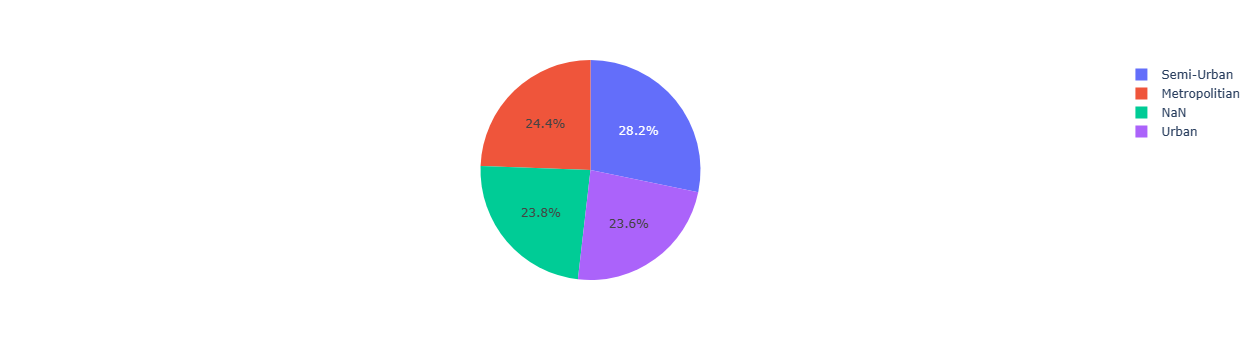

In [5]:
# gráfico
px.pie( entregadores_cidade, values='Delivery_person_Age', names='City' )


## 2. Desenhe um gráfico de linha, mostrando o número total de entregas diárias feitas por densidade de tráfego igual a “Low” e “Jam”


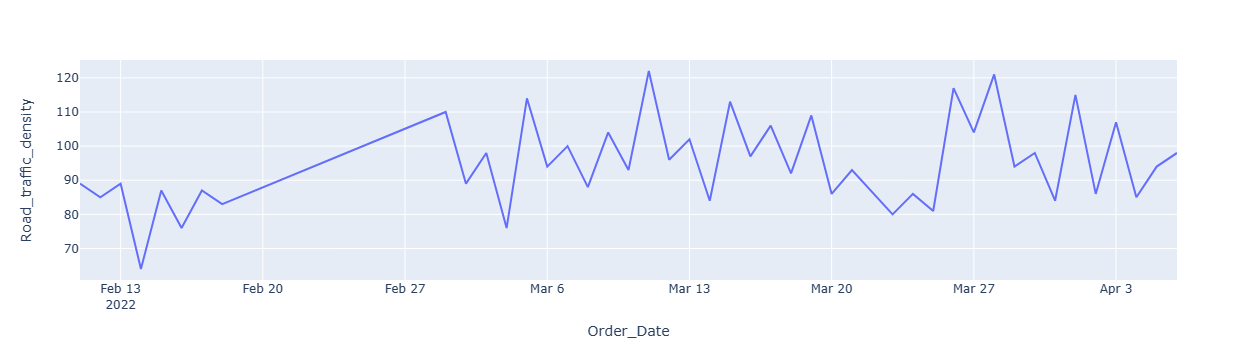

In [6]:
# Preparar Dataframe apenas com total de entregas Low e Jam
colunas = ['Order_Date', 'Road_traffic_density']
df_aux = df.loc[:, colunas].groupby( ['Order_Date'] ).count().reset_index()
df_aux = df_aux.loc[df_aux['Road_traffic_density'] != 'NaN', :]
df_aux = df_aux.loc[df_aux['Road_traffic_density'] != 'High', :]
df_aux = df_aux.loc[df_aux['Road_traffic_density'] != 'Medium', :]
df_aux

# Grafico
px.line( df_aux, x='Order_Date', y='Road_traffic_density' )



## 3. Desenhe um gráfico de barras, mostrando as avaliações médias das entregas por semana.


In [15]:
# Criando as semanas e adicionando no Dataframe
df['week_of_year'] = df['Order_Date'].dt.strftime( "%U" )

# Avaliações Medias por Semana
colunas = ['week_of_year', 'Delivery_person_Ratings']
df_aux = df.loc[:, colunas].groupby( ['week_of_year'] ).mean().reset_index()

# Grafico
px.bar( df_aux, x='week_of_year', y='Delivery_person_Ratings', title='Teste')


## 4. Desenhe um gráfico de pizza, mostrando a média de avaliações das entregas feitas por condições climáticas?


In [ ]:
# Media das avaliações feitas por condições climaticas
colunas = ['Weatherconditions', 'Delivery_person_Ratings']
df_aux = df.loc[:, colunas].groupby( ['Weatherconditions'] ).mean().reset_index()

# Grafico
px.pie( df_aux, values='Delivery_person_Ratings', names='Weatherconditions' )
